In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

# 1. Add the src folder to your path
sys.path.append(os.path.abspath('../src'))

# 2. Import your loader from load_structured.py
from load_structured import load_data 

# 3. Load the data
df = load_data()

# 4. Prepare features for the graphs
features = ['Hormone_Level_Abnormality', 'Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level', 'Infertility', 'BMI', 'Diagnosis', 'Cluster']

if df is not None:
    x = df[features]
    y = df['Diagnosis']
    # Scaling is mandatory for PCA to work correctly
    x_scaled = StandardScaler().fit_transform(x)
    print("Environment verified. Data loaded and scaled.")
    
# 1. Create Age Ranges (18-25, 26-35, 36-45, 46-50)
# We use 17 as the lower bound to include age 18
#df['Age_Group'] = pd.cut(df['Age'], bins=[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], labels=['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50'])
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 24, 34, 44, 50], labels=['18-24', '25-34', '35-44', '45-50'])
#df['Age_Group'] = pd.cut(df['Age'], bins=[17, 34, 50], labels=['18-34', '35-50'])

# 2. Round Chronic Pain Level to the nearest integer (0-10)
df['Chronic_Pain_Level_Group'] =  pd.cut(df['Chronic_Pain_Level'], bins=[-1,0,3,6,10], labels=['0', '1-3', '4-6', '7-10']) 
#df['Chronic_Pain_Level_Group'] =  pd.cut(df['Chronic_Pain_Level'], bins=[-1,0,1,2,3,4,5,6,7,8,9,10], labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
# IN THE FUTURE, WILL REMOVE CHRONIC PAIN LEVEL GROUPING TO STANDARDIZE WITH OTHER DATASETS, AS THIS FEATURE IS NOT ALWAYS AVAILABLE.
# 0: No pain.
# 1-3: Mild pain (annoying, distracting, but manageable).
# 4-6: Moderate pain (interferes with daily activities).
# 7-10: Severe pain (disabling, unable to perform daily tasks)


# 3. Create BMI Ranges (15-20, 21-26, 27-32, 33-40)
# We round the BMI first, then bin it
#df['BMI_Group'] = df['BMI'].round()
#df['BMI_Group'] = pd.cut(df['BMI'], bins=[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], labels=['15', '16', '17', '18', '19','20', '21', '22', '23', '24', '25', '26', '27','28','29','30','31','32','33','34','35','36','37','38','39','40'])
df['BMI_Group'] = pd.cut(df['BMI'], bins=[14, 19, 25, 30, 40], labels=['15-19', '20-25', '26-30', '31-40'])
#df['BMI_Group'] = pd.cut(df['BMI'], bins=[14, 26, 40], labels=['15-26', '27-40'])


# Numeric features list for math-based models
features_numeric = ['Hormone_Level_Abnormality', 'Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level', 'Infertility', 'BMI', 'Diagnosis', 'Cluster']

# Categorical features list for Parallel Categories/Sunburst
features_categorical = ['Hormone_Level_Abnormality', 'Age_Group', 'Menstrual_Irregularity', 'Chronic_Pain_Level_Group', 'Infertility', 'BMI_Group', 'Diagnosis', 'Cluster']    

Environment verified. Data loaded and scaled.


In [14]:
# Define the dimensions you care about
dims = ['Hormone_Level_Abnormality', 'Menstrual_Irregularity', 'Infertility', 'Cluster']

# Count every unique combination
pathway_counts = (
    df[dims]
    .astype(str)               # make sure categoricals are hashable
    .groupby(dims)
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

print(pathway_counts.head(10))

  Hormone_Level_Abnormality Menstrual_Irregularity Infertility Cluster  Count
6                         1                      1           0       0   2926
2                         0                      1           0       4   1994
7                         1                      1           1       2   1230
4                         1                      0           0       1   1213
0                         0                      0           0       1    884
3                         0                      1           1       3    825
5                         1                      0           1       2    542
1                         0                      0           1       3    386


In [64]:

print("--- Diagnosis Split ---")
print(df['Diagnosis'].value_counts())

print("\n--- Hormone Abnormality Split ---")
print(df['Hormone_Level_Abnormality'].value_counts())
print("\n--- Diagnosis vs Hormone Abnormality ---")
print(pd.crosstab(df['Diagnosis'], df['Hormone_Level_Abnormality']))

print("\n--- Age Split ---")
print(df['Age_Group'].value_counts())
print("\n--- Diagnosis vs Age ---")
print(pd.crosstab(df['Diagnosis'], df['Age_Group']))

print("\n--- Menstrual Irregularity Split ---")
print(df['Menstrual_Irregularity'].value_counts())
print("\n--- Diagnosis vs Menstrual Irregularity ---")
print(pd.crosstab(df['Diagnosis'], df['Menstrual_Irregularity']))

print("\n--- Chronic Pain Level Split ---")
print(df['Chronic_Pain_Level_Group'].value_counts())
print("\n--- Diagnosis vs Chronic Pain Level ---")
print(pd.crosstab(df['Diagnosis'], df['Chronic_Pain_Level_Group']))

print("\n--- Infertility Split ---")
print(df['Infertility'].value_counts())
print("\n--- Diagnosis vs Infertility ---")
print(pd.crosstab(df['Diagnosis'], df['Infertility']))

print("\n--- BMI Split ---")
print(df['BMI_Group'].value_counts())
print("\n--- Diagnosis vs BMI ---")
print(pd.crosstab(df['Diagnosis'], df['BMI_Group']))

print("\n--- Cluster Split ---")
print(df['Cluster'].value_counts())
print("\n--- Diagnosis vs Cluster ---")
print(pd.crosstab(df['Diagnosis'], df['Cluster']))

--- Diagnosis Split ---
Diagnosis
0    5921
1    4079
Name: count, dtype: int64

--- Hormone Abnormality Split ---
Hormone_Level_Abnormality
1    5911
0    4089
Name: count, dtype: int64

--- Diagnosis vs Hormone Abnormality ---
Hormone_Level_Abnormality     0     1
Diagnosis                            
0                          2873  3048
1                          1216  2863

--- Age Split ---
Age_Group
35-44    3185
25-34    3113
18-24    2117
45-50    1585
Name: count, dtype: int64

--- Diagnosis vs Age ---
Age_Group  18-24  25-34  35-44  45-50
Diagnosis                            
0           1244   1832   1886    959
1            873   1281   1299    626

--- Menstrual Irregularity Split ---
Menstrual_Irregularity
1    6975
0    3025
Name: count, dtype: int64

--- Diagnosis vs Menstrual Irregularity ---
Menstrual_Irregularity     0     1
Diagnosis                         
0                       2006  3915
1                       1019  3060

--- Chronic Pain Level Split ---
Chro

In [16]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.parallel_categories(
    df, 
    dimensions=['Age_Group', 'Infertility', 'Menstrual_Irregularity','Hormone_Level_Abnormality', 'Diagnosis'],
    color="Cluster",
    color_continuous_scale=px.colors.sequential.RdPu,
    title="Volume Flow of Endometriosis Symptoms",
)


fig.show()

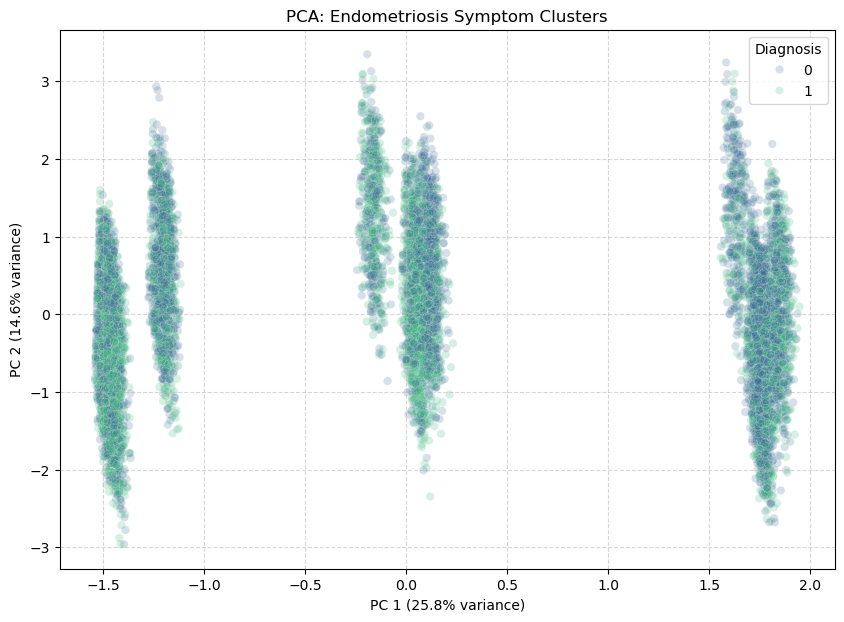

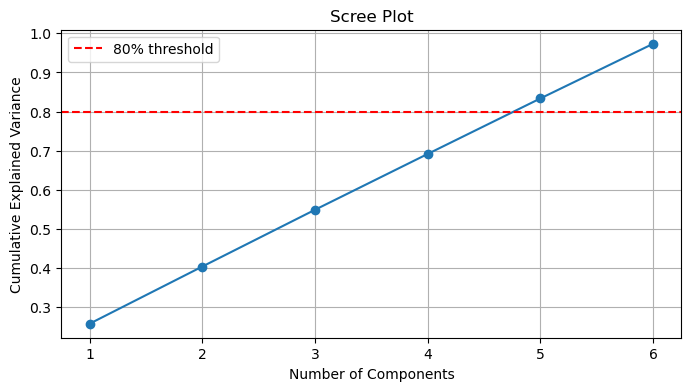

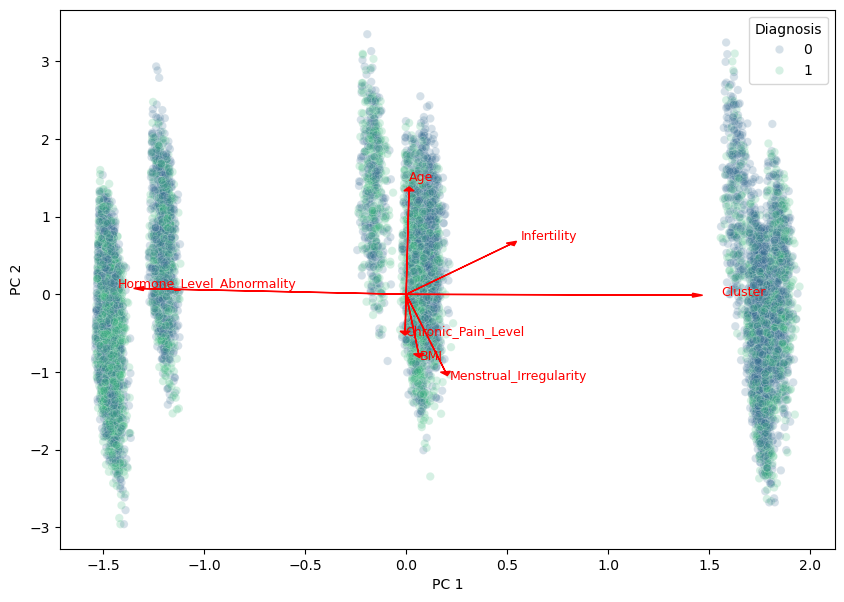

In [18]:
# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

# Create plotting dataframe
pca_df = pd.DataFrame(data=principalComponents, columns=['PC 1', 'PC 2'])
pca_df['Diagnosis'] = y

# Visualize
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC 1', y='PC 2', hue='Diagnosis', data=pca_df, palette='viridis', alpha=0.2)
plt.title('PCA: Endometriosis Symptom Clusters')
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

pca_full = PCA(n_components=6)  # All 6 features
pca_full.fit(x_scaled)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 7), pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='PC 1', y='PC 2', hue='Diagnosis', data=pca_df, 
                palette='viridis', alpha=0.2, ax=ax)

# Draw arrows for each feature
loadings = pca.components_.T  # Shape: (n_features, 2)
for i, feature in enumerate(features):  # features without Diagnosis
    ax.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2, head_width=0.05, head_length=0.05, fc='red', ec='red')
    ax.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, feature, fontsize=9, color='red')

TypeError: DataFrame._get_value() missing 1 required positional argument: 'col'

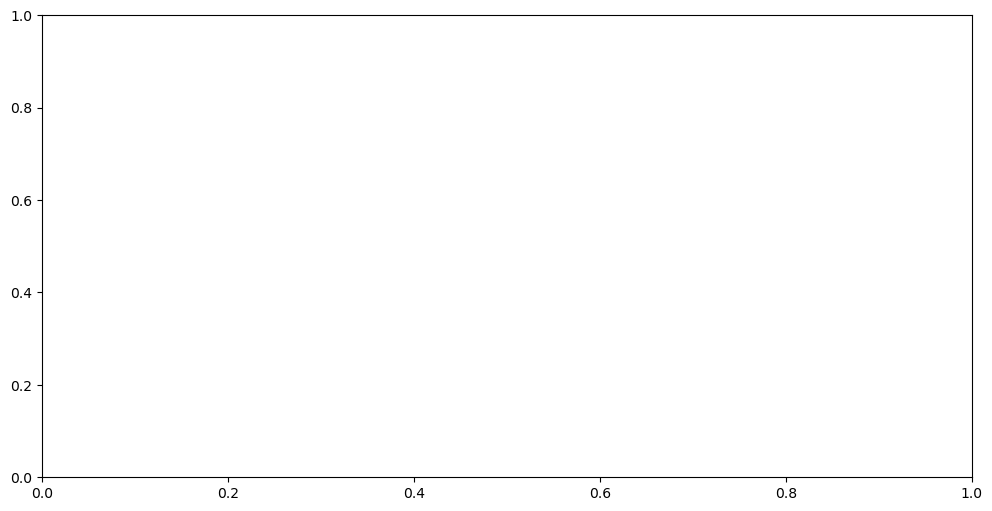

In [91]:
# Normalize data to 0-1 scale so 'Age' and 'BMI' don't overwhelm the 0/1 columns
df_norm = df.copy()
for col in features:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    

plt.figure(figsize=(12, 6))
# Using only the features and the diagnosis for the plot
parallel_coordinates(df_norm[features + ['Diagnosis']], 'Diagnosis', color=('#440154', '#21918c'), alpha=0.1)

plt.title('Symptom Pathways: Endometriosis vs. Control Group')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

# Using the raw dataframe 'df' so we see real numbers (Age, BMI, etc.)
fig = px.parallel_coordinates(
    df, dimensions=['Hormone_Level_Abnormality', 'Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level', 'Infertility', 'BMI'],
    color="Diagnosis",
    color_continuous_scale=px.colors.diverging.Tealrose,
    title="Endometriosis Diagnostic Pathways (Raw Clinical Ranges)"
)

fig.show()

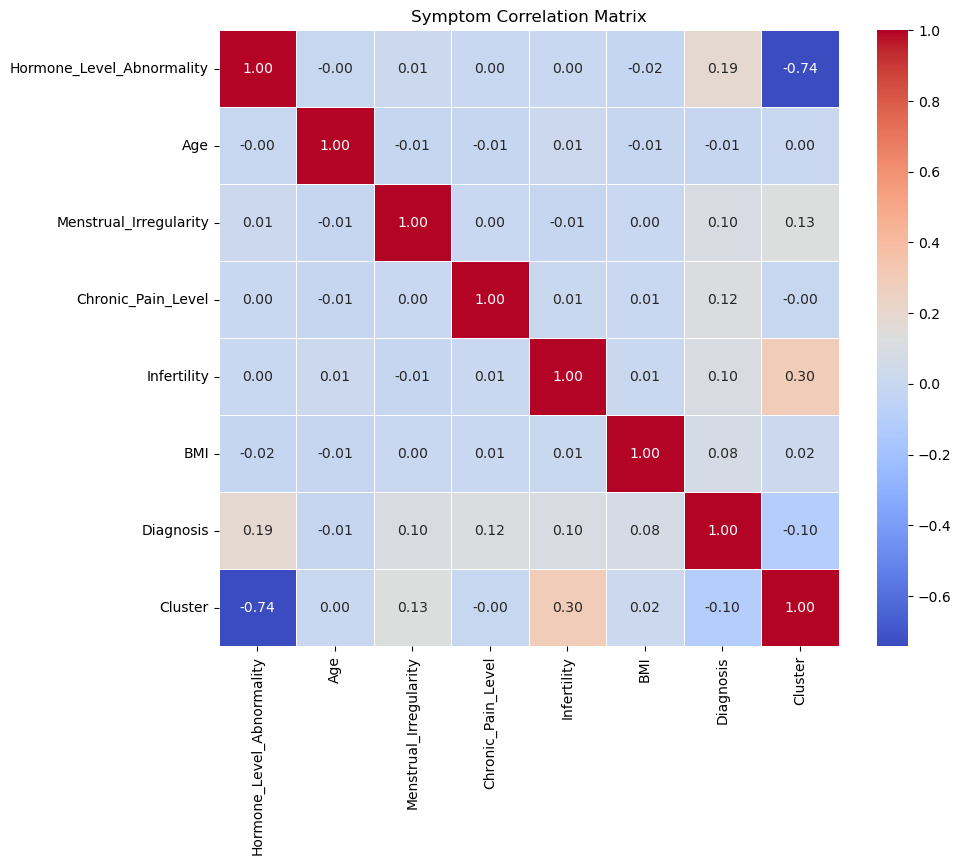

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# Calculate the correlation matrix
corr = df[features_numeric].corr() 
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Symptom Correlation Matrix")
plt.show()

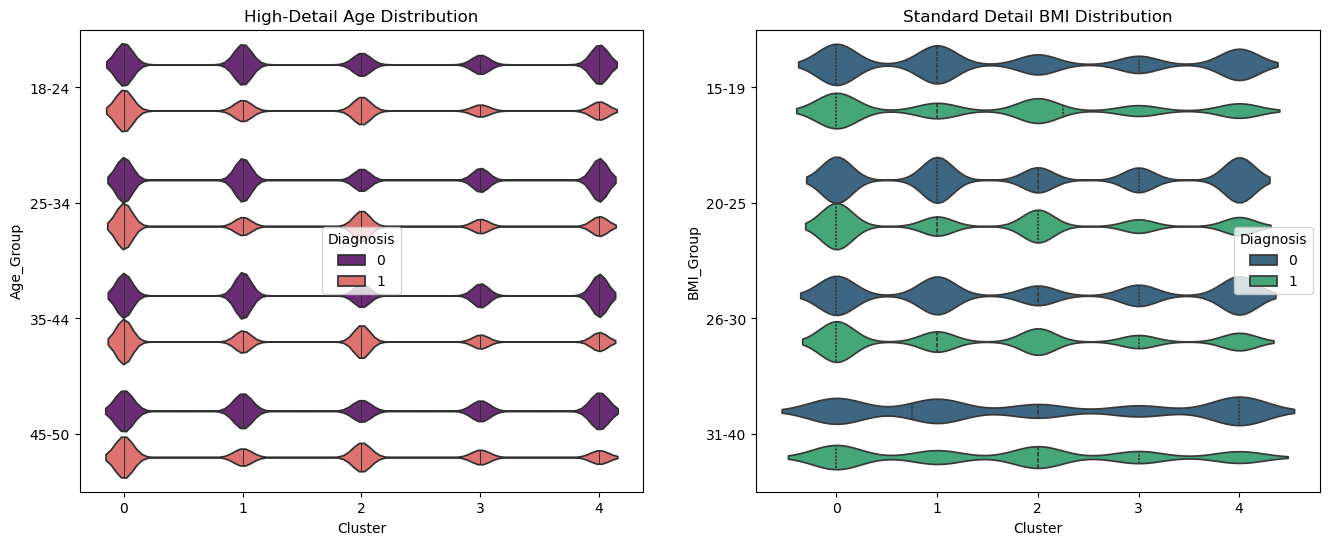

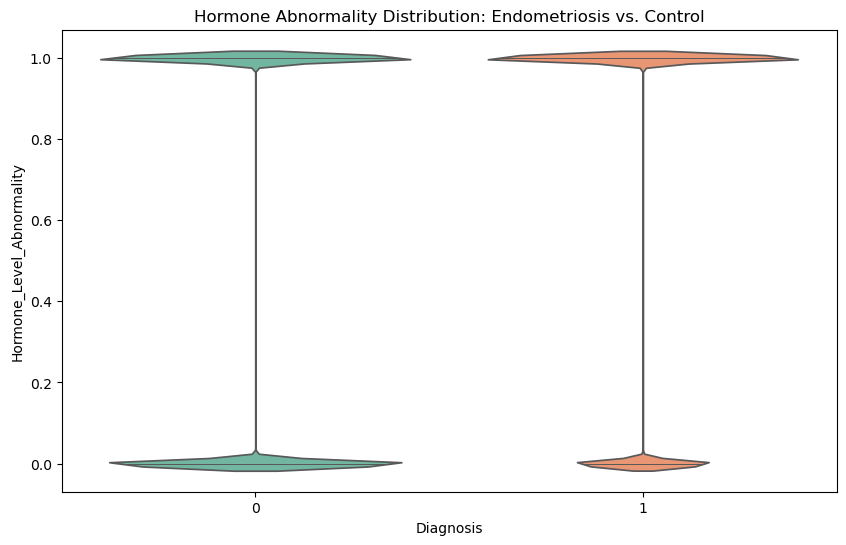

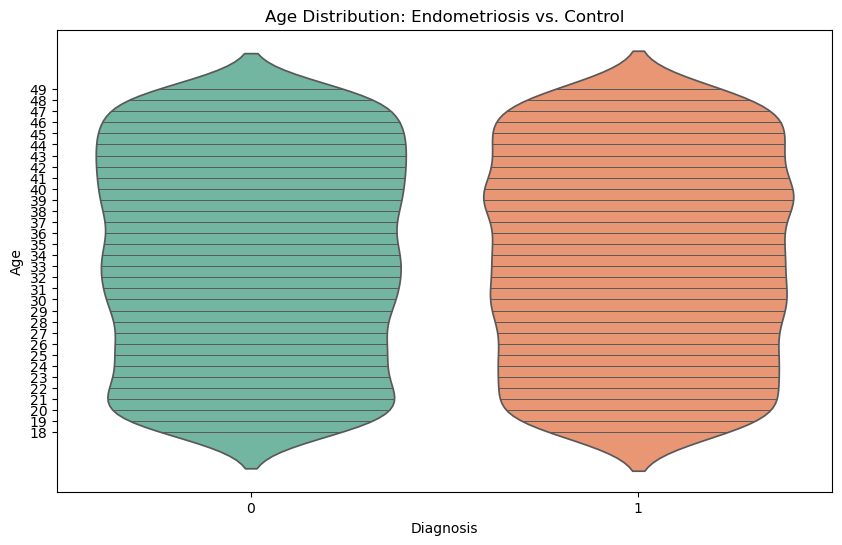

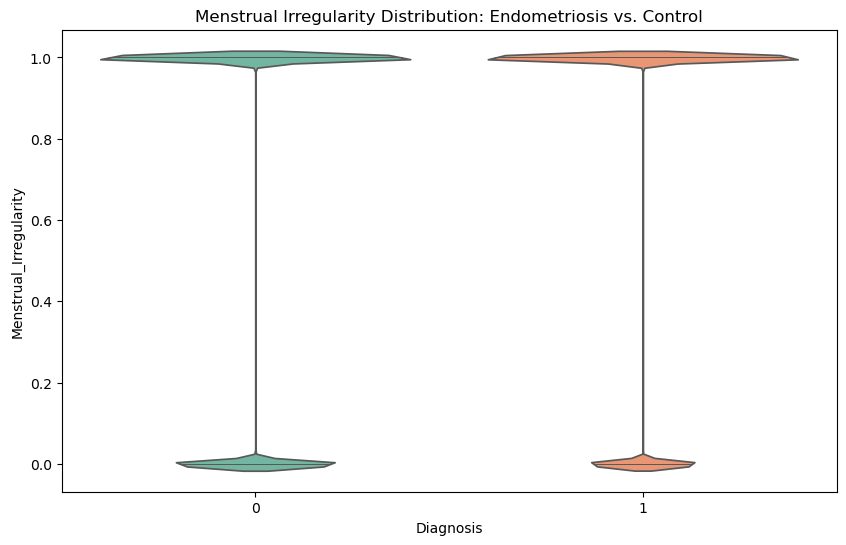

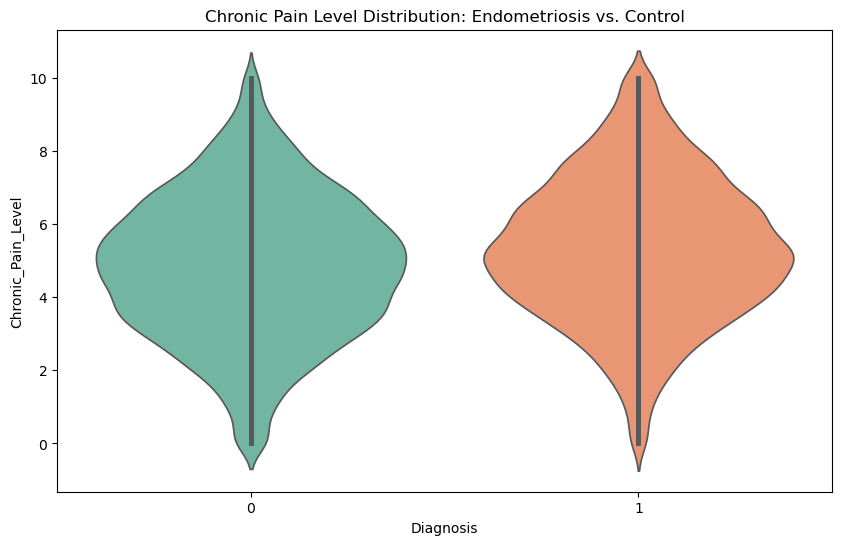

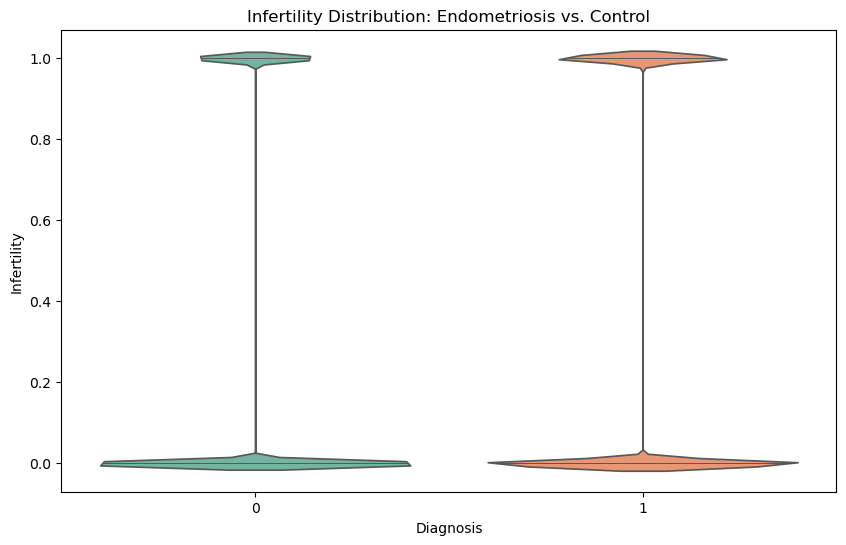

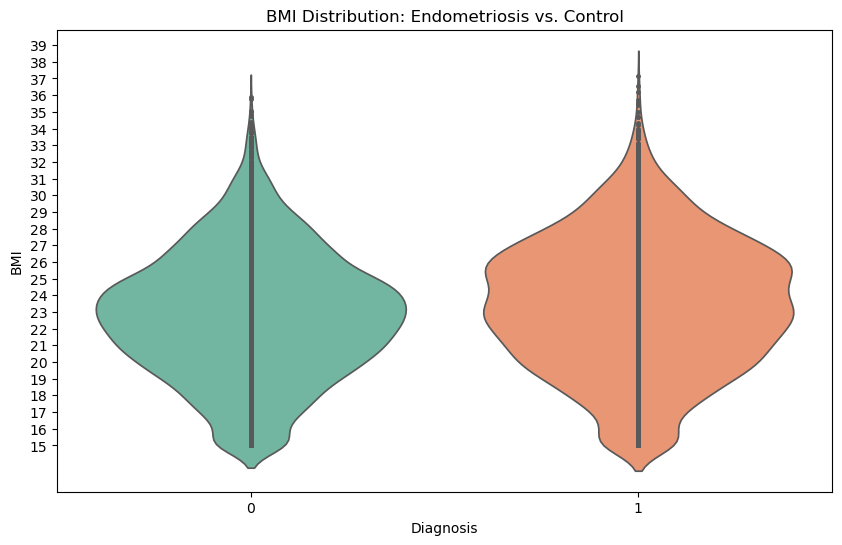

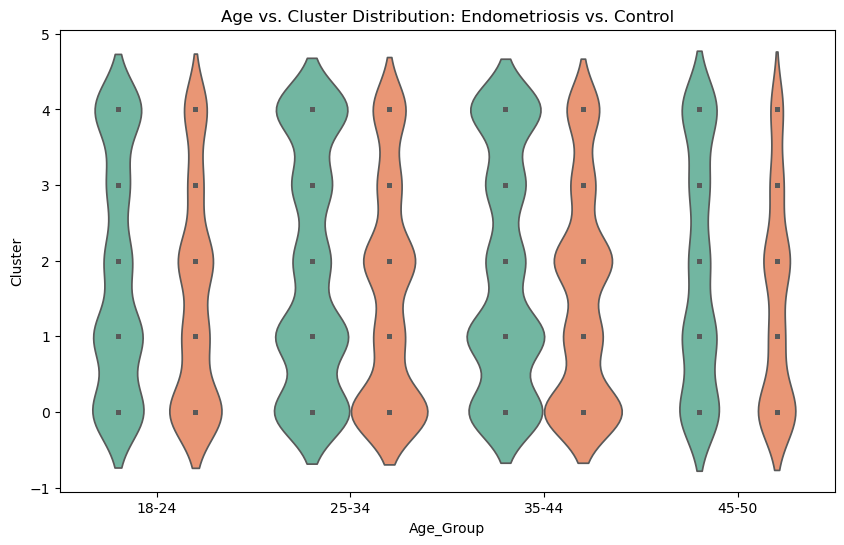

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two plots side-by-side to compare "increments"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. High-Detail Age Plot (Every year matters)
# We set bw_adjust low to see the "spikes" at specific ages
sns.violinplot(x='Cluster', y='Age_Group', data=df, ax=ax1, bw_adjust=0.2, inner="stick", hue="Diagnosis", palette="magma")
ax1.set_title("High-Detail Age Distribution")

# 2. Standard Detail BMI Plot
# BMI is a float, so we want some smoothing, but not too much
sns.violinplot(x='Cluster', y='BMI_Group', data=df, ax=ax2, bw_adjust=0.5, inner="quart", hue="Diagnosis",palette="viridis")
ax2.set_title("Standard Detail BMI Distribution")

plt.show()

# Looking at distribution between the two groups
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='Hormone_Level_Abnormality', data=df, bw_adjust=0.1, inner="stick", density_norm='count', hue="Diagnosis", palette="Set2", legend=False)
plt.title("Hormone Abnormality Distribution: Endometriosis vs. Control")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='Age', data=df, inner='stick', density_norm='count', hue="Diagnosis", palette="Set2", legend=False)
plt.title("Age Distribution: Endometriosis vs. Control")
plt.yticks(range(18, 50))
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='Menstrual_Irregularity', data=df, bw_adjust=0.1, inner="stick", density_norm='count', hue="Diagnosis", palette="Set2", legend=False)
plt.title("Menstrual Irregularity Distribution: Endometriosis vs. Control")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='Chronic_Pain_Level', data=df, inner="point", density_norm='count', hue="Diagnosis", palette="Set2", legend=False)
plt.title("Chronic Pain Level Distribution: Endometriosis vs. Control")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='Infertility', data=df, bw_adjust=0.1, inner="stick", density_norm='count', hue="Diagnosis", palette="Set2", legend=False)
plt.title("Infertility Distribution: Endometriosis vs. Control")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='BMI', data=df, inner="point", density_norm='count', hue="Diagnosis", palette="Set2", legend=False)
plt.title("BMI Distribution: Endometriosis vs. Control")
plt.yticks(range(15, 40))
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Age_Group', y='Cluster', data=df, inner="point", density_norm='count', hue="Diagnosis", palette="Set2", legend=False)
plt.title("Age vs. Cluster Distribution: Endometriosis vs. Control")
plt.show()

In [78]:
import plotly.express as px

# We'll look at Diagnosis -> Hormone Abnormality -> Infertility
fig = px.sunburst(
    df, 
    path=['Diagnosis', 'Hormone_Level_Abnormality', 'Infertility'], 
    color='Diagnosis',
    color_continuous_scale='RdBu',
    title="Hierarchy of Endometriosis Clinical Indicators"
)
fig.show()

In [79]:
import plotly.graph_objects as go

# 1. Calculate averages for both groups
features = ['Age', 'BMI', 'Chronic_Pain_Level', 'Menstrual_Irregularity', 'Infertility', 'Hormone_Level_Abnormality', 'Diagnosis', 'Cluster']
# Normalize the averages to a 0-1 scale for the radar "shape"
df_means = df.groupby('Diagnosis')[features_numeric].mean()
df_norm = (df_means - df[features].min()) / (df[features].max() - df[features].min())

fig = go.Figure()

# 2. Add the "Endometriosis" profile
fig.add_trace(go.Scatterpolar(r=df_norm.loc[1].values, theta=features, fill='toself', name='Endometriosis'
))

# 3. Add the "Control" profile
fig.add_trace(go.Scatterpolar( r=df_norm.loc[0].values, theta=features, fill='toself', name='Control'
))

fig.update_layout( polar=dict(radialaxis=dict(visible=True, range=[0, 1])), title="Clinical Subtype Profile: Endo vs Control"
)

fig.show()

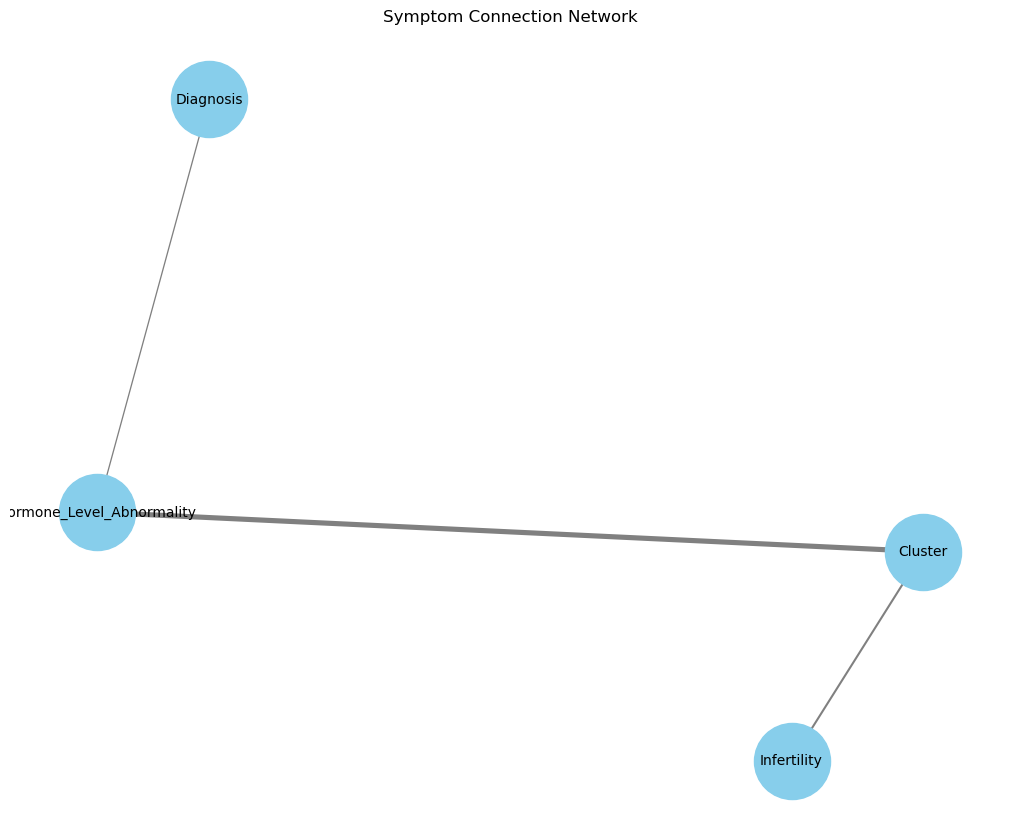

In [80]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Calculate correlation
corr = df[features].corr().values
G = nx.Graph()

# 2. Add nodes and weighted edges based on correlation
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        # Only draw lines for correlations > 0.1 to keep it clean
        if abs(corr[i,j]) > 0.18:
            G.add_edge(features[i], features[j], weight=corr[i,j])

# 3. Draw the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5) # Spreads out the nodes

# Draw lines (edges) with thickness based on correlation strength
weights = [G[u][v]['weight'] * 5 for u,v in G.edges()]
nx.draw(G, pos, with_labels=True, node_color='skyblue', 
        node_size=3000, width=weights, edge_color='gray', font_size=10)

plt.title("Symptom Connection Network")
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
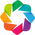

:Chord   [source,target]   (value)

In [81]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

# 1. Create a simplified 'Links' dataframe (Source, Target, Value)
# We use the correlation matrix again
corr_matrix = df[features].corr().stack().reset_index()
corr_matrix.columns = ['source', 'target', 'value']

# 2. Filter out self-correlations and weak links
links = corr_matrix[(corr_matrix['source'] != corr_matrix['target']) & (corr_matrix['value'] > 0.1)]

# 3. Build the Chord object
chord = hv.Chord(links)

# 4. Style it
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=hv.dim('source').str(), labels='index', node_color=hv.dim('index').str())
)

hv.save(chord, 'symptom_chord.html') # Save as HTML to view in browser
chord